In [16]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from IPython.display import SVG, Image

In [17]:
train_dir='dataset/train'
test_dir='dataset/test'

In [18]:
def load_dataset(directory):
  image_paths=[]
  labels=[]

  for label in os.listdir(directory):
    for filename in os.listdir(directory+"/"+label):
      image_path=os.path.join(directory,label,filename)
      image_paths.append(image_path)
      labels.append(label)
    print(label,"compelted")

  return image_paths, labels

In [19]:
train=pd.DataFrame()
train['image'], train['label']=load_dataset(train_dir)

train=train.sample(frac=1).reset_index(drop=True)
train.head()

fear compelted
disgust compelted
neutral compelted
surprise compelted
sad compelted
happy compelted
angry compelted


,image,label
0,dataset/train/happy/Training_158782.jpg,happy
1,dataset/train/surprise/Training_87792027.jpg,surprise
2,dataset/train/angry/Training_44719671.jpg,angry
3,dataset/train/happy/Training_12514490.jpg,happy
4,dataset/train/sad/Training_19230405.jpg,sad


In [20]:
test=pd.DataFrame()
test['image'], test['label']=load_dataset(test_dir)
test.head()

fear compelted
disgust compelted
neutral compelted
surprise compelted
sad compelted
happy compelted
angry compelted


,image,label
0,dataset/test/fear/PublicTest_80861502.jpg,fear
1,dataset/test/fear/PrivateTest_7183558.jpg,fear
2,dataset/test/fear/PublicTest_44296746.jpg,fear
3,dataset/test/fear/PublicTest_65218414.jpg,fear
4,dataset/test/fear/PublicTest_19459861.jpg,fear


In [21]:
label_count=train['label'].value_counts()

In [22]:
print(label_count)

label
happy       7215
neutral     4965
sad         4830
fear        4097
angry       3995
surprise    3171
disgust      436
Name: count, dtype: int64


In [23]:
def extract_features(images):
  features=[]
  for image in tqdm(images):
    img=load_img(image,grayscale=True)
    img=np.array(img)
    features.append(img)
  features=np.array(features)
  features=features.reshape(len(features),48,48,1)
  return features


In [9]:
train_features=extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [10]:
test_features=extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [11]:
x_train=train_features/255.0
x_test=test_features/255.0

In [12]:
len(x_test[1])

48

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(train['label'])
y_train=le.transform(train['label'])
y_test=le.transform(test['label'])

In [14]:
y_train=to_categorical(y_train,num_classes=7)
y_test=to_categorical(y_test, num_classes=7)

In [15]:
y_train[1]

array([0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
input_shape=(48,48,1)
output_class=7


In [24]:
model = Sequential()

# Conv Block 1
model.add(Conv2D(64, (3,3), padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 2
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 3
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 3
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected Block 1
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected Block 2
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='sigmoid'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [79]:
history=model.fit(x=x_train,y=y_train,batch_size=128, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
225/225 [==============================] - 346s 2s/step - loss: 1.8221 - accuracy: 0.2936 - val_loss: 2.0901 - val_accuracy: 0.2471
Epoch 2/10
225/225 [==============================] - 363s 2s/step - loss: 1.4667 - accuracy: 0.4360 - val_loss: 1.5938 - val_accuracy: 0.3813
Epoch 3/10
225/225 [==============================] - 361s 2s/step - loss: 1.2876 - accuracy: 0.5068 - val_loss: 1.4030 - val_accuracy: 0.4744
Epoch 4/10
225/225 [==============================] - 359s 2s/step - loss: 1.1962 - accuracy: 0.5455 - val_loss: 1.3063 - val_accuracy: 0.5003
Epoch 5/10
225/225 [==============================] - 360s 2s/step - loss: 1.1230 - accuracy: 0.5731 - val_loss: 1.2431 - val_accuracy: 0.5245
Epoch 6/10
225/225 [==============================] - 360s 2s/step - loss: 1.0714 - accuracy: 0.5914 - val_loss: 1.2598 - val_accuracy: 0.5103
Epoch 7/10
225/225 [==============================] - 360s 2s/step - loss: 1.0283 - accuracy: 0.6107 - val_loss: 1.1958 - val_accuracy: 0.5538

In [80]:
model.save('Model1_2_sigmoid.h5')

In [25]:
from keras.models import load_model
model1=load_model('Model1_2_sigmoid.h5')

225/225 [==============================] - 16s 69ms/step


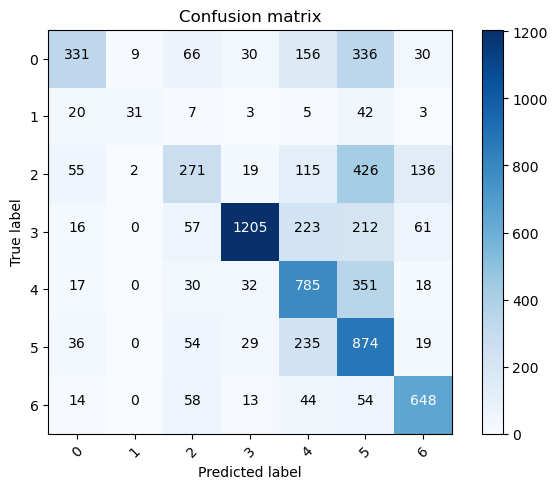

In [28]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model1.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7))

In [30]:
score, acc = model1.evaluate(x_test, y_test, batch_size=100)
print('Test score:', score)
print("Test accuracy:", acc)

72/72 [==============================] - 15s 211ms/step - loss: 1.1353 - accuracy: 0.5775
Test score: 1.1352895498275757
Test accuracy: 0.577458918094635
